In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import math
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl

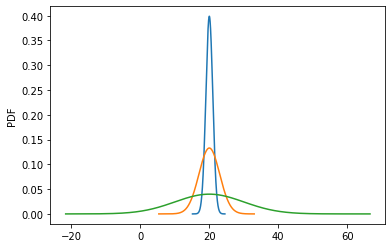

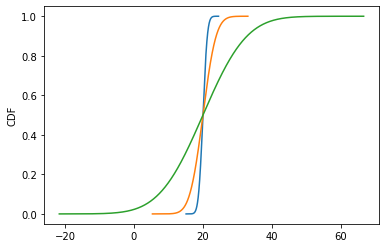

In [2]:
# Task for normal distribution
def generate_normal_data(mean, std_dev, size=100000):
    t1 = sorted(np.random.normal(mean, std_dev, size))
    t2 = norm.pdf(t1, mean, std_dev)
    return t1, t2

x1, y1 = generate_normal_data(20, 1)
x2, y2 = generate_normal_data(20, 3)
x3, y3 = generate_normal_data(20, 10)

# PDF
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.ylabel("PDF")
plt.show()

# CDF
y1 = norm.cdf(x1, 20, 1)
y2 = norm.cdf(x2, 20, 3)
y3 = norm.cdf(x3, 20, 10)
plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.ylabel("CDF")
plt.show()


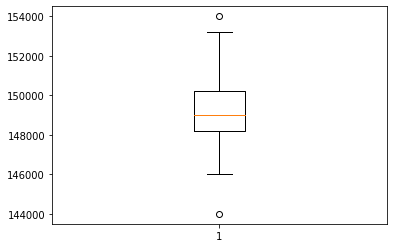

In [3]:
# Time -> Milliseconds
def calc_ms(time):
    s = time.split(":")
    return int(s[0]) * 60000 + float(s[1]) * 1000

belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",")

# Delete old miliseconds
belmont["Miliseconds"] = None
belmont["Miliseconds"] = belmont.Miliseconds.astype(float)

# Calculate milliseconds
belmont["Miliseconds"] = belmont.apply(lambda row: calc_ms(row["Time"]), axis=1)

plt.boxplot(belmont["Miliseconds"])
plt.show()

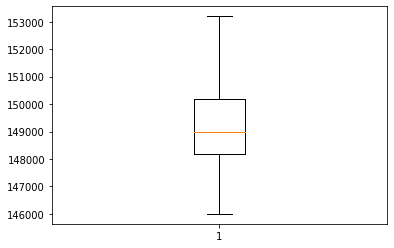

In [4]:
# Detect outliers with IQR
times = belmont["Miliseconds"]
q75, q25 = np.percentile(times, [75 ,25])
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr

# filter outliers
times_no_outliers = []
for t in times:
    if t >= lower_bound and t <= upper_bound:
        times_no_outliers.append(t)

plt.boxplot(times_no_outliers)
plt.show()

Mean: 149221.01123595505, Std: 1618.6456017743403


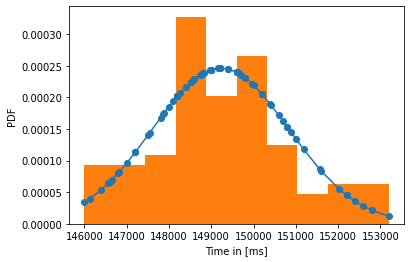

In [5]:
# Check times against normal pdf

mu = np.mean(times_no_outliers)  # Mean
sigma = np.std(times_no_outliers)  # Std dev
print(F"Mean: {mu}, Std: {sigma}")

times_no_outliers = sorted(times_no_outliers)
fit = stats.norm.pdf(times_no_outliers, mu, sigma)

# Plot PDF
pl.plot(times_no_outliers, fit, "-o")

# Plot actual data
pl.hist(times_no_outliers, density=True)

_ = plt.xlabel('Time in [ms]')
_ = plt.ylabel('PDF')
plt.show()